## 01. Import and Load Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2, sys


# Manually specify the path to the project directory
project_path = '../../'

# Add the project directory to sys.path
sys.path.append(project_path)

from mansoor import Repeatable

### Create Instance of Repeater Class

In [2]:
r = Repeatable(300,300, base_path='../../data/images/', video_path='../../data/video/') # It have functions that we need to do Repeatedly

## 02. Color Picker Using OpenCV

#### Create a blank Image

In [3]:
# We Create a white Image 
image = np.ones((500,500, 3), np.uint8) * 255

##### We create a Function that return Nothing

In [4]:
def returnNone(x):
    pass

In [5]:
# We create a new window and Named It
cv2.namedWindow('Colors')

# We create a track bar that take values b/w 0-255
cv2.createTrackbar("R", "Colors", 0, 255, returnNone)
cv2.createTrackbar("G", "Colors", 0, 255, returnNone)
cv2.createTrackbar("B", "Colors", 0, 255, returnNone)

while True:
    if cv2.waitKey(1) & 0xff == ord('p'):
        break
    # We get values from track bar and store them in variable
    red = cv2.getTrackbarPos('R', 'Colors')
    g = cv2.getTrackbarPos('G', 'Colors')
    b = cv2.getTrackbarPos('B', 'Colors')

    # Change values in a image
    image[:] = [b,g,red]

    # Show image in same window
    cv2.imshow("Colors", image)

cv2.destroyAllWindows()

### `getTrackbarPosition() Function in OpenCV`

#### Lets change Image Color On The Basis Of Track Bar

In [6]:
cv2.namedWindow("Effect On Images")

# create track bar
bar = cv2.createTrackbar("Track Bar", "Effect On Images", 0, 5, returnNone)


while True:
    if cv2.waitKey(1) & 0xff == ord('p'):
        break

    # Get value of Bar
    bar = cv2.getTrackbarPos('Track Bar', 'Effect On Images')

    if bar == 0:
        # Load Image 
        img = r.load_image('1.jpg')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    elif bar == 1:
        # Load Image 
        img = r.load_image('1.jpg')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
    elif bar == 3:
        img = r.load_image('1.jpg')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    elif bar == 4:
        img = r.load_image('1.jpg')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2LUV)
    else:
        img = r.load_image('1.jpg')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    cv2.imshow('Effect On Images', img)

cv2.destroyAllWindows()        

## 03. ROI

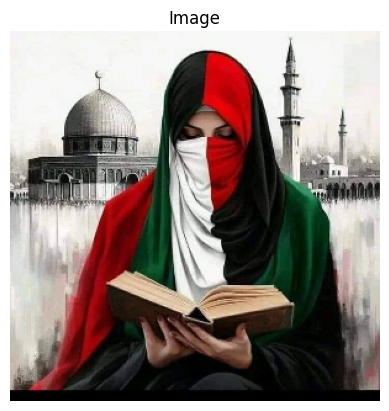

Image 1 shape: (727, 720, 3)


In [7]:
img = r.load_image('1.jpg')
r.show_image_with_color(img)
r.shape_of_images(img)

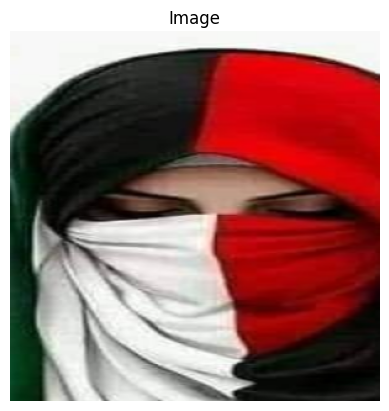

In [8]:
# img[y1:y2, x1:x2]
# startX, startY, endX, endY = 300, 20, 450, 400

# Crop the image using slicing
cropped_image = img[20:400, 300:450]
r.show_image_with_color(cropped_image)

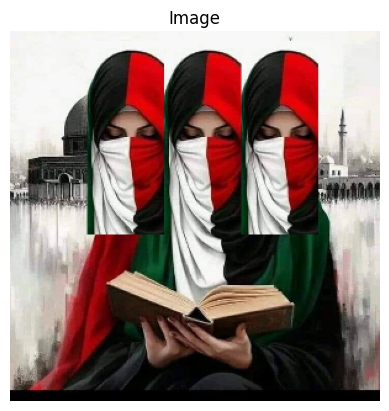

In [13]:
img[20:400, 450:600] = cropped_image
img[20:400, 150:300] = cropped_image
r.show_image_with_color(img)

In [10]:
cropped_image.shape

(380, 150, 3)

### RoI on another Image

Image 1 shape: (1024, 1024, 3)


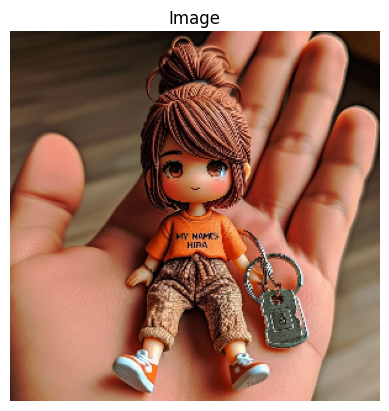

In [35]:
img = r.load_image('img6.jpg')
r.shape_of_images(img)
r.show_image_with_color(img)

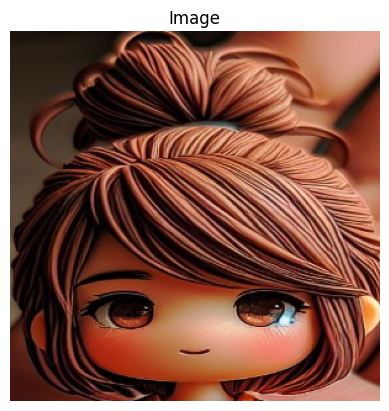

In [36]:
cropped_image = img[20:500, 360:665] # img[startY:endY, startX:endX]
r.show_image_with_color(cropped_image)

```ractamgle = cv2.rectangle(img,  pt1 = (360,20), pt2= (665,500), color=(0,243,120), thickness=2, lineType=16)```
`r.show_image_with_color(ractamgle`

#### Create Multiple Faces

In [40]:
cropped_image = img[20:500, 360:665] # img[startY:endY, startX:endX]

In [43]:
img[20:500, 55:360] = cropped_image # Left Side
img[20:500, 665:970] = cropped_image # Right Side

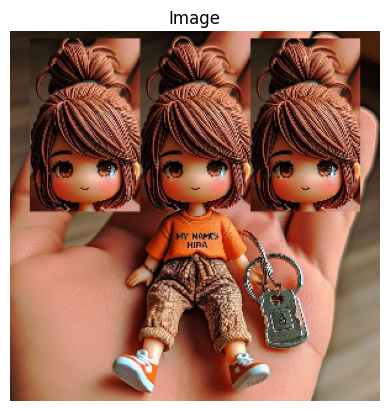

In [44]:
r.show_image_with_color(img)

## Flip ,Rotate and Transpose The Image

### Load Image

In [45]:
img = r.load_image()

### Flip The Image

In [53]:
flip_y = cv2.flip(img, flipCode=1) # Flip the Image In Y-Axis
flip_x = cv2.flip(img, flipCode=0) # Flip the Image In X-Axis
flip_xy = cv2.flip(img, flipCode=-1) # Flip the Image In X,y-Axis

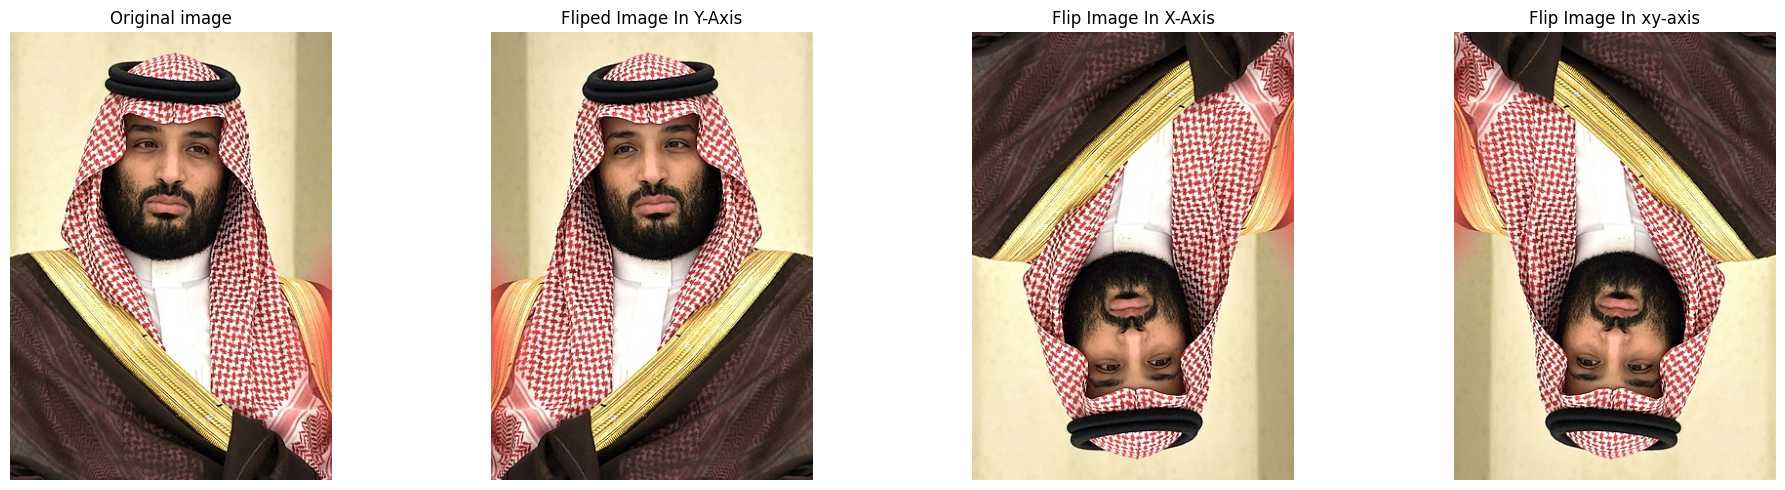

In [54]:
r.show_multiple_images((img, flip_y, flip_x, flip_xy), titles=("Original image", "Fliped Image In Y-Axis", "Flip Image In X-Axis", "Flip Image In xy-axis"), cols=4, resize=False)

### Rotate The Image

In [56]:
rotate_180 = cv2.rotate(img, cv2.ROTATE_180)
rotate_90_clock = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
rotate_90_anti_clock = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)

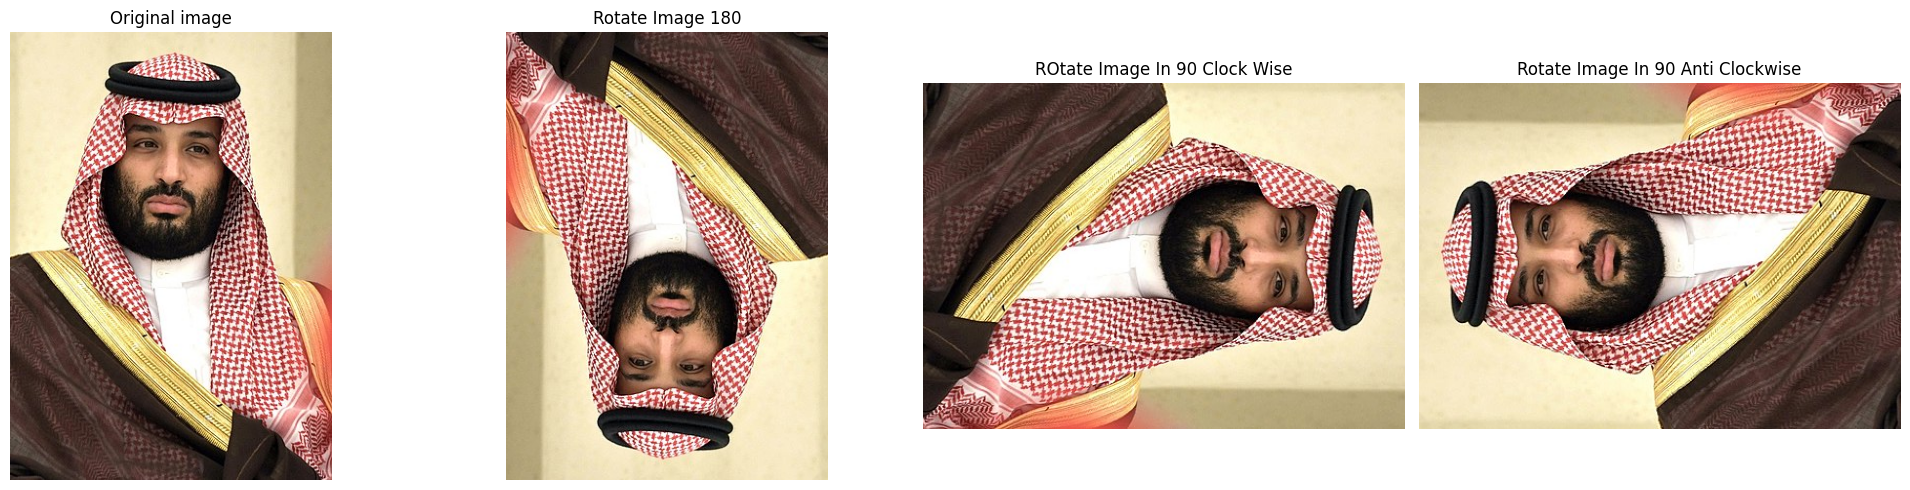

In [57]:
r.show_multiple_images((img, rotate_180, rotate_90_clock, rotate_90_anti_clock), titles=("Original image", "Rotate Image 180", "ROtate Image In 90 Clock Wise", "Rotate Image In 90 Anti Clockwise"), cols=4, resize=False)

### Transpose Image

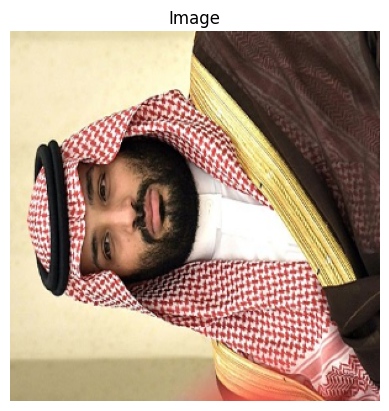

In [58]:
transpose = cv2.transpose(img)
r.show_image_with_color(transpose)